In [146]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [147]:
## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')

df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################
KOSPI200_close.head()

,005930,000660,005380,005490,051910,035420,207940,105560,028260,055550,...,192400,003920,027410,036580,004490,002960,008060,014830,097230,000050
Date,,,,,,,,,,,,,,,,,,,,,
2017.02.08,1920000,54600,139000,268000,270500,795000,163000,47250,127500,46050,...,133000,741000,92000,11600,35600,424000,8320,43100,2880,14100
2017.02.09,1920000,52700,140000,271500,272000,787000,161000,47600,126000,46650,...,133500,732000,91800,11750,35450,423000,8350,43600,2915,14050
2017.02.10,1918000,50000,141000,275500,281000,795000,158000,47800,127500,47500,...,135500,741000,98700,12100,35300,424500,8400,44050,2925,14200
2017.02.13,1898000,50700,139500,278500,279500,795000,158000,47950,125500,47100,...,134500,747000,99800,12100,35200,427000,8350,44600,2990,14400
2017.02.14,1879000,48450,140000,282500,277000,770000,156500,48000,126000,47250,...,138000,753000,100500,12150,35450,426500,8310,44200,2985,14450


In [148]:
temp_df=KOSPI200_close.copy()
temp_diff=temp_df/temp_df.shift(1)
df_port_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[1:120].mean().tolist()]
df_port_info['stddaily']=[x*100 for x in temp_diff.iloc[1:120].std().tolist()]
df_port_info['ratio']=(df_port_info['avgdaily'])/df_port_info['stddaily']

df_sort=df_port_info.sort_values(by=['ratio'],ascending=False)
df_sort

,Code,Name,avgdaily,stddaily,ratio
116,020150,일진머티리얼즈,0.893738,3.339015,0.267665
103,010120,LS산전,0.278459,1.228189,0.226723
99,010620,현대미포조선,0.555474,2.595585,0.214007
48,078930,GS,0.331547,1.571191,0.211016
57,071050,한국금융지주,0.371946,1.777495,0.209253
30,000030,우리은행,0.290979,1.394801,0.208617
37,009150,삼성전기,0.488208,2.362979,0.206607
154,093050,LF,0.358158,1.813889,0.197453
24,010950,S-Oil,0.315884,1.603849,0.196954
6,207940,삼성바이오로직스,0.482286,2.473670,0.194968


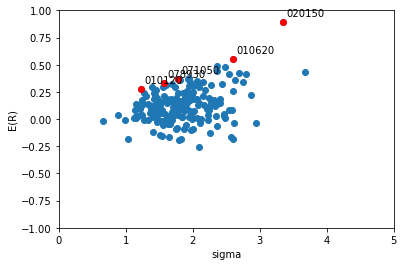

In [149]:
plt.scatter(df_port_info.iloc[:,3],df_port_info.iloc[:,2])
plt.axis([0,5,-1,1])
plt.xlabel('sigma')
plt.ylabel('E(R)')

nn=5
for i in range(nn):
    plt.scatter(df_sort.iloc[i,3],df_sort.iloc[i,2],color='r')
    plt.text(df_sort.iloc[i,3]+0.05,df_sort.iloc[i,2]+0.05,str(df_sort.iloc[i,0]))

In [150]:
port_list=df_sort['Code'].iloc[:nn].tolist()
covMat=temp_diff.iloc[1:120].cov().loc[port_list,port_list]*10000
covMat

,020150,010120,010620,078930,071050
020150,11.149022,1.073651,-0.624331,0.078109,0.150477
010120,1.073651,1.508447,0.551833,0.101025,0.110624
010620,-0.624331,0.551833,6.737064,0.485162,0.895267
078930,0.078109,0.101025,0.485162,2.468642,0.831820
071050,0.150477,0.110624,0.895267,0.831820,3.159488


In [151]:
n_2comb=int(nn*(nn-1)/2)
n_iter=int(n_2comb*30+500)
result_list=np.zeros((n_iter,2))
port_list=np.zeros((n_2comb,2),dtype=int)
c=0
for i in range(nn):
    for j in range(i+1,nn):
        port_list[c,0]=i
        port_list[c,1]=j
        c+=1

c=0
wMat=np.zeros((n_iter,nn))

for k in range(n_2comb):
    aa=np.random.uniform(0,1,[30,2])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((30,2))
    for i in range(30):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[port_list[k],port_list[k]])
                                        *np.array(cc[i,:])*(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[port_list[k]])*cc[i,:])
        wMat[c,port_list[k,0]]=cc[i,0]
        wMat[c,port_list[k,1]]=cc[i,1]
        c+=1


aa=np.random.uniform(0,1,[n_iter,nn])
bb=np.sum(aa,axis=1)
for i in range(500):
    wMat[c,:]=aa[i,:]/bb[i]
    result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[:nn,:nn])*np.array(wMat[i,:])
                                 *(np.array(wMat[i,:]).reshape(-1,1))))
    result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[:nn])*wMat[i,:])
    c+=1
result_list

array([[ 1.9515651 ,  0.59287269],
       [ 1.96066107,  0.59508214],
       [ 2.51873782,  0.72203034],
       ..., 
       [ 0.9781464 ,  0.38054645],
       [ 1.24251449,  0.50875526],
       [ 1.47127379,  0.5786553 ]])

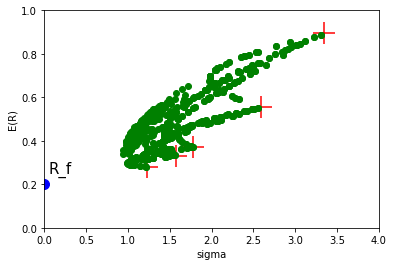

In [152]:
# 무위험자산 daily 수익 0.2라 가정
r_f=0.2

plt.scatter(df_sort['stddaily'].iloc[:nn],df_sort['avgdaily'].iloc[:nn],color='r',marker='+',s=500)
plt.xlabel('sigma')
plt.ylabel('E(R)')
plt.axis([0,4,0,1])
plt.scatter(0,r_f,color='b',s=100)
plt.text(0.05,r_f+0.05,'R_f',size=15)
plt.scatter(result_list[:,0],result_list[:,1],color='g')

In [153]:
# 시장포트폴리오 M 구하기
ratio_list=(result_list[:,1]-r_f)/result_list[:,0]
M=np.argmax(ratio_list)
M

638

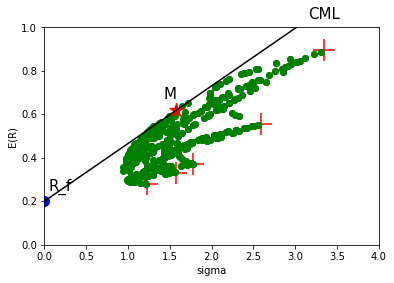

In [154]:
plt.scatter(df_sort['stddaily'].iloc[:nn],df_sort['avgdaily'].iloc[:nn],color='r',marker='+',s=500)
plt.xlabel('sigma')
plt.ylabel('E(R)')
plt.axis([0,4,0,1])
plt.scatter(0,r_f,color='b',s=100)
plt.text(0.05,r_f+0.05,'R_f',size=15)

plt.scatter(result_list[:,0],result_list[:,1],color='g')
plt.scatter(result_list[M,0],result_list[M,1],color='r',marker='*',s=200)
plt.text(result_list[M,0]-0.15,result_list[M,1]+0.05,'M',size=15)

plt.plot([0,(result_list[M,0]*2)],[r_f,ratio_list[M]*(result_list[M,0]*2)+r_f],color='k')
plt.text(result_list[M,0]*2,ratio_list[M]*(result_list[M,0]*2)+r_f,'CML',size=15)

In [155]:
# beta 구해보기 (각자 특정 기준에 의해 선정된 포트폴리오의 beta를 구해보기)
port_list=df_sort['Code'].iloc[:nn].tolist()
covMat=temp_diff.iloc[1:120].cov().loc[port_list,port_list]*10000
covMat

,020150,010120,010620,078930,071050
020150,11.149022,1.073651,-0.624331,0.078109,0.150477
010120,1.073651,1.508447,0.551833,0.101025,0.110624
010620,-0.624331,0.551833,6.737064,0.485162,0.895267
078930,0.078109,0.101025,0.485162,2.468642,0.831820
071050,0.150477,0.110624,0.895267,0.831820,3.159488


In [156]:
wMat[M]

array([ 0.15223084,  0.30987585,  0.18395377,  0.14697917,  0.20696037])

In [157]:
beta_list=np.zeros(nn)
for i in range(nn):
    beta_list[i]=np.sum(covMat.iloc[:,i]*wMat[M])/result_list[M,0]
beta_list

array([ 1.23985698,  0.48774121,  0.99549566,  0.42270295,  0.63207209])

In [158]:
str(beta_list[0])

'1.23985698258'

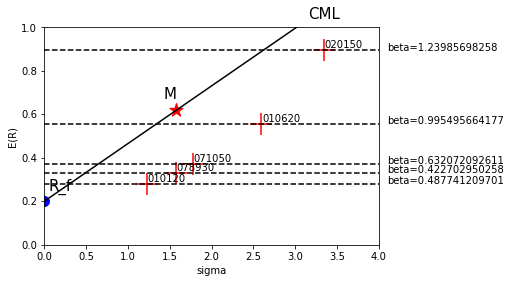

In [163]:
plt.scatter(df_sort['stddaily'].iloc[:nn],df_sort['avgdaily'].iloc[:nn],color='r',marker='+',s=500)
for i in range(nn):
    plt.text(4.1,df_sort['avgdaily'].iloc[i],'beta='+str(beta_list[i]))
    plt.plot([0,4],[df_sort['avgdaily'].iloc[i],df_sort['avgdaily'].iloc[i]],color='k',linestyle='--')
    plt.text(df_sort['stddaily'].iloc[i]+0.01,df_sort['avgdaily'].iloc[i]+0.01,df_sort.iloc[i,0])

plt.scatter(0,r_f,color='b',s=100)
plt.text(0.05,r_f+0.05,'R_f',size=15)

plt.scatter(result_list[M,0],result_list[M,1],color='r',marker='*',s=200)
plt.text(result_list[M,0]-0.15,result_list[M,1]+0.05,'M',size=15)

plt.xlabel('sigma')
plt.ylabel('E(R)')
plt.axis([0,4,0,1])

plt.plot([0,(result_list[M,0]*2)],[r_f,ratio_list[M]*(result_list[M,0]*2)+r_f],color='k')
plt.text(result_list[M,0]*2,ratio_list[M]*(result_list[M,0]*2)+r_f,'CML',size=15)

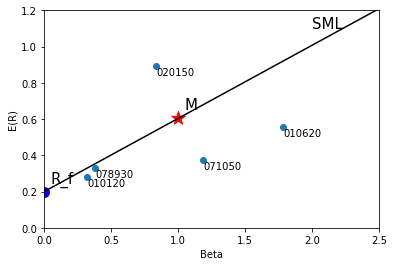

In [135]:
plt.scatter(beta_list,df_sort['avgdaily'].iloc[:nn])
for i in range(nn):
    plt.text(beta_list[i],df_sort['avgdaily'].iloc[i]-0.05,str(df_sort.iloc[i,0]))

plt.scatter(0,r_f,color='b',s=100)
plt.text(0.05,r_f+0.05,'R_f',size=15)

plt.scatter(1,result_list[M,1],color='r',marker='*',s=200)
plt.text(1+0.05,result_list[M,1]+0.05,'M',size=15)

plt.xlabel('Beta')
plt.ylabel('E(R)')
plt.axis([0,2.5,0,1.2])

plt.text(2.0,1.1,'SML',size=15)
plt.plot([0,2.5],[r_f,r_f+2.5*(result_list[M,1]-r_f)],color='k')

In [137]:
########### logic1 : 1/N 균등분배 ########################
RESULT=np.zeros((len(balanceMat),3))
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
top_N=5
###########################################################

for i in range(nperiod):
    ##### 종목 선정 #################################################
    cur=120+rperiod*i
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)])
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)

    port_list=list(df_sort.iloc[:top_N,0])
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance/top_N)/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]

    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf['Code_period'+str(i)]=list(df_sort['Code'].iloc[:top_N])
    df_pf['Name_period'+str(i)]=list(df_sort['Name'].iloc[:top_N])
    df_pf['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:top_N])
    df_pf['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,0]=balanceMat

In [138]:
df_pf

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,2.707317,511.0,020150,일진머티리얼즈,2.732441,504.0,020150,일진머티리얼즈,...,2.197222,54.0,115390,락앤락,1.972509,776.0,009420,한올바이오파마,2.023904,865.0
1,010620,현대미포조선,1.859504,180.0,009150,삼성전기,1.723549,203.0,207940,삼성바이오로직스,...,1.706806,681.0,020150,일진머티리얼즈,1.696774,616.0,069620,대웅제약,1.960557,138.0
2,009150,삼성전기,1.727768,215.0,093370,후성,1.699545,1835.0,000660,SK하이닉스,...,1.622340,139.0,207940,삼성바이오로직스,1.543524,63.0,115390,락앤락,1.815603,900.0
3,207940,삼성바이오로직스,1.711656,71.0,207940,삼성바이오로직스,1.684524,72.0,035720,카카오,...,1.569892,957.0,114090,GKL,1.482222,673.0,004000,롯데정밀화학,1.643038,347.0
4,003300,한일시멘트,1.644737,160.0,006400,삼성SDI,1.541176,103.0,008930,한미사이언스,...,1.554770,97.0,128940,한미약품,1.475827,39.0,010060,OCI,1.638322,143.0


In [ ]:
def find_mvp(cMat,df_s,nn):
    result_list=np.zeros((300,2))
    result_weight=np.zeros((300,nn))
    c=0

    aa=np.random.uniform(0,1,[300,nn])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((300,nn))

    for i in range(300):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[:nn,:nn])*np.array(cc[i,:])
                                     *(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_s['avgdaily'].iloc[:nn])*cc[i,:])
        result_weight[c,:]=cc[i,:]
        c+=1

    ## Find MVP ###############################################
    index_mvp = np.argmin(result_list[:,0])
    return result_weight[index_mvp]

In [139]:
########### logic2 : MVP ########################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port2_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf2=pd.DataFrame()
del df_port2_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################
for i in range(nperiod):
    ##### 종목 선정 #################################################
    cur=120+rperiod*i
    
    temp_df=KOSPI200_close.copy()
    temp_diff=temp_df/temp_df.shift(1)
    df_port2_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)

    df_port2_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[cur-119:cur].mean().tolist()]
    df_port2_info['stddaily']=[x*100 for x in temp_diff.iloc[cur-119:cur].std().tolist()]
    del df_port2_info['Unnamed: 0']

    df_sort2=df_port2_info.sort_values(by=['avgdaily'],ascending=False)
    port_list=df_sort2['Code'].iloc[:5].tolist()
    covMat=temp_diff.iloc[cur-119:cur].cov().loc[port_list,port_list]*10000
    
    top_N=5
    port_list=list(df_sort2.iloc[:top_N,0])
    idx=find_mvp(covMat,df_sort2,top_N)
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance*idx[j])/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]

    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf2['Code_period'+str(i)]=list(df_sort2['Code'].iloc[:top_N])
    df_pf2['Name_period'+str(i)]=list(df_sort2['Name'].iloc[:top_N])
    df_pf2['return_period'+str(i)]=list(df_sort2['avgdaily'].iloc[:top_N])
    df_pf2['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,1]=balanceMat
df_pf2

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,0.893738,99.0,020150,일진머티리얼즈,0.909719,120.0,020150,일진머티리얼즈,...,0.700428,51.0,115390,락앤락,0.626519,850.0,009420,한올바이오파마,0.663768,336.0
1,010620,현대미포조선,0.555474,217.0,009150,삼성전기,0.485790,175.0,207940,삼성바이오로직스,...,0.527097,289.0,020150,일진머티리얼즈,0.531724,269.0,069620,대웅제약,0.608733,181.0
2,009150,삼성전기,0.488208,277.0,093370,후성,0.480556,2218.0,000660,SK하이닉스,...,0.432086,201.0,207940,삼성바이오로직스,0.403130,90.0,115390,락앤락,0.565214,714.0
3,207940,삼성바이오로직스,0.482286,89.0,207940,삼성바이오로직스,0.468777,83.0,035720,카카오,...,0.427527,1286.0,128940,한미약품,0.362711,30.0,004000,롯데정밀화학,0.457562,419.0
4,003300,한일시멘트,0.446180,172.0,008930,한미사이언스,0.391093,344.0,008930,한미사이언스,...,0.406909,87.0,004000,롯데정밀화학,0.351389,493.0,010060,OCI,0.445150,225.0


In [140]:
def find_M(cMat,df_s,nn,r_f):
    n_2comb=int(nn*(nn-1)/2)
    n_iter=int(n_2comb*30+500)
    result_list=np.zeros((n_iter,2))
    port_list=np.zeros((n_2comb,2),dtype=int)
    c=0
    for i in range(nn):
        for j in range(i+1,nn):
            port_list[c,0]=i
            port_list[c,1]=j
            c+=1

    c=0
    wMat=np.zeros((n_iter,nn))

    for k in range(n_2comb):
        aa=np.random.uniform(0,1,[30,2])
        bb=np.sum(aa,axis=1)
        cc=np.zeros((30,2))
        for i in range(30):
            cc[i,:]=aa[i,:]/bb[i]
            result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[port_list[k],port_list[k]])
                                            *np.array(cc[i,:])*(np.array(cc[i,:]).reshape(-1,1))))
            result_list[c,1]=np.sum(np.array(df_s['avgdaily'].iloc[port_list[k]])*cc[i,:])
            wMat[c,port_list[k,0]]=cc[i,0]
            wMat[c,port_list[k,1]]=cc[i,1]
            c+=1


    aa=np.random.uniform(0,1,[n_iter,nn])
    bb=np.sum(aa,axis=1)
    for i in range(500):
        wMat[c,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[:nn,:nn])*np.array(wMat[i,:])
                                     *(np.array(wMat[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_s['avgdaily'].iloc[:nn])*wMat[i,:])
        c+=1

    ratio_list=(result_list[:,1]-r_f)/result_list[:,0]
    M=np.argmax(ratio_list)
    return wMat,M

In [141]:
########### logic3 : 시장포트폴리오에 투자 ########################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port3_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf3=pd.DataFrame()
del df_port3_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
top_N=5
###########################################################
for i in range(nperiod):
    ##### 종목 선정 #################################################
    cur=120+rperiod*i
    
    temp_df=KOSPI200_close.copy()
    temp_diff=temp_df/temp_df.shift(1)
    
    df_port3_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
    
    df_port3_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[cur-119:cur].mean().tolist()]
    df_port3_info['stddaily']=[x*100 for x in temp_diff.iloc[cur-119:cur].std().tolist()]
    df_port3_info['ratio']=(df_port3_info['avgdaily'])/df_port3_info['stddaily']
    del df_port3_info['Unnamed: 0']
    
    df_sort3=df_port3_info.sort_values(by=['ratio'],ascending=False)
    
    
    port_list=df_sort3['Code'].iloc[:top_N].tolist()
    covMat=temp_diff.iloc[cur-119:cur].cov().loc[port_list,port_list]*10000
    
    weightMat,idxM=find_M(covMat,df_sort3,top_N,0.2)
    print(weightMat[idxM])
    ################################################################
    
    ##### 자산 배분 #################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=floor((balance*weightMat[idxM,j])/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]

    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    
    df_pf3['Code_period'+str(i)]=list(df_sort3['Code'].iloc[:top_N])
    df_pf3['Name_period'+str(i)]=list(df_sort3['Name'].iloc[:top_N])
    df_pf3['ratio_period'+str(i)]=list(df_sort3['ratio'].iloc[:top_N])
    df_pf3['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,2]=balanceMat
df_pf3

[ 0.02336082  0.18816678  0.62913396  0.1573472   0.00199124]
[ 0.24405621  0.16451155  0.22075759  0.10141537  0.26925928]
[ 0.02739208  0.34447242  0.06671246  0.3806164   0.18080664]
[ 0.21542104  0.23955581  0.45253741  0.05068134  0.0418044 ]
[ 0.18914893  0.04806265  0.49093261  0.08014532  0.19171049]
[ 0.20554144  0.15197256  0.11196928  0.25093968  0.27957704]


,Code_period0,Name_period0,ratio_period0,volume_period0,Code_period1,Name_period1,ratio_period1,volume_period1,Code_period2,Name_period2,...,ratio_period3,volume_period3,Code_period4,Name_period4,ratio_period4,volume_period4,Code_period5,Name_period5,ratio_period5,volume_period5
0,020150,일진머티리얼즈,0.267665,59.0,020150,일진머티리얼즈,0.253803,566.0,000660,SK하이닉스,...,0.253999,49.0,114090,GKL,0.194110,472.0,069620,대웅제약,0.208544,103.0
1,010120,LS산전,0.226723,315.0,000030,우리은행,0.214780,830.0,035720,카카오,...,0.195079,52.0,115390,락앤락,0.182623,138.0,010060,OCI,0.181591,79.0
2,010620,현대미포조선,0.214007,569.0,009150,삼성전기,0.206909,206.0,207940,삼성바이오로직스,...,0.193170,267.0,051910,LG화학,0.176053,99.0,051910,LG화학,0.175458,22.0
3,078930,GS,0.211016,214.0,207940,삼성바이오로직스,0.189531,33.0,020150,일진머티리얼즈,...,0.172137,36.0,207940,삼성바이오로직스,0.144325,18.0,009420,한올바이오파마,0.169530,789.0
4,071050,한국금융지주,0.209253,2.0,010120,LS산전,0.186737,436.0,000150,두산,...,0.166793,45.0,096770,SK이노베이션,0.143954,78.0,128940,한미약품,0.161447,38.0


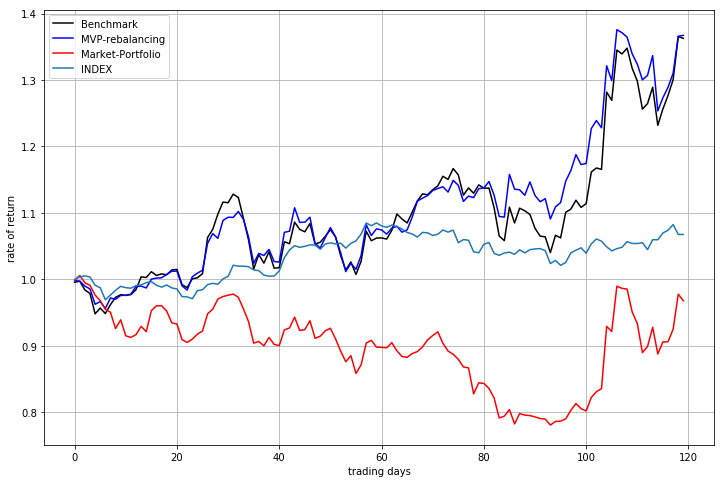

In [142]:
plt.figure(figsize=(12,8))
plt.plot(RESULT[120:,0]/initial_balance,color='k')
plt.plot(RESULT[120:,1]/initial_balance,color='b')
plt.plot(RESULT[120:,2]/initial_balance,color='r')

plt.plot(list(KOSPI200_index['Close'])[120:]/KOSPI200_index['Close'][120])
plt.grid(20)
plt.ylabel('rate of return')
plt.xlabel('trading days')
plt.legend(['Benchmark','MVP-rebalancing','Market-Portfolio','INDEX'])